In [103]:
pip install Ipython

In [104]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')



In [105]:
data = pd.read_csv('movie_metadata2.csv')

In [106]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0


In [107]:
data.shape

(3441, 28)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3433 non-null   object 
 1   director_name              3376 non-null   object 
 2   num_critic_for_reviews     3430 non-null   float64
 3   duration                   3437 non-null   float64
 4   director_facebook_likes    3376 non-null   float64
 5   actor_3_facebook_likes     3435 non-null   float64
 6   actor_2_name               3437 non-null   object 
 7   actor_1_facebook_likes     3441 non-null   int64  
 8   gross                      3149 non-null   float64
 9   genres                     3441 non-null   object 
 10  actor_1_name               3441 non-null   object 
 11  movie_title                3441 non-null   object 
 12  num_voted_users            3441 non-null   int64  
 13  cast_total_facebook_likes  3441 non-null   int64

In [109]:
data = data.drop(['color','director_facebook_likes','actor_3_facebook_likes',
                  'actor_1_facebook_likes','cast_total_facebook_likes','actor_2_facebook_likes',
                  'facenumber_in_poster','content_rating',
                  'movie_imdb_link','aspect_ratio','plot_keywords'],
                 axis=1)

In [110]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'country', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441 entries, 0 to 3440
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3376 non-null   object 
 1   num_critic_for_reviews  3430 non-null   float64
 2   duration                3437 non-null   float64
 3   actor_2_name            3437 non-null   object 
 4   gross                   3149 non-null   float64
 5   genres                  3441 non-null   object 
 6   actor_1_name            3441 non-null   object 
 7   movie_title             3441 non-null   object 
 8   num_voted_users         3441 non-null   int64  
 9   actor_3_name            3435 non-null   object 
 10  num_user_for_reviews    3432 non-null   float64
 11  language                3436 non-null   object 
 12  country                 3436 non-null   object 
 13  budget                  3216 non-null   float64
 14  title_year              3371 non-null   

In [112]:
round(100*(data.isnull().sum()/len(data.index)),2)

director_name             1.89
num_critic_for_reviews    0.32
duration                  0.12
actor_2_name              0.12
gross                     8.49
genres                    0.00
actor_1_name              0.00
movie_title               0.00
num_voted_users           0.00
actor_3_name              0.17
num_user_for_reviews      0.26
language                  0.15
country                   0.15
budget                    6.54
title_year                2.03
imdb_score                0.03
movie_facebook_likes      0.03
dtype: float64

In [113]:
data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

In [114]:
data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              1
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              2
num_user_for_reviews      0
language                  1
country                   0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [115]:
data = data[data.isnull().sum(axis=1)<=2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              1
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              2
num_user_for_reviews      0
language                  1
country                   0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [116]:
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(),inplace = True)
data['duration'].fillna(data['duration'].mean(),inplace=True)

data['language'].fillna(data['language'].mode()[0],inplace=True)

data['actor_2_name'].fillna('Unknown Actor',inplace=True)
data['actor_3_name'].fillna('Unknown Actor',inplace=True)

data.isnull().sum()

director_name             0
num_critic_for_reviews    0
duration                  0
actor_2_name              0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              0
num_user_for_reviews      0
language                  0
country                   0
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [117]:
data['budget'] = data['budget']/1000000
data['gross'] = data['gross']/1000000

In [118]:
data['Profit'] = data['gross'] - data['budget']

In [119]:
data[['Profit','movie_title']].sort_values(by='Profit',ascending=False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
794,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [120]:
print("Rows before Deleting: ",data.shape[0])

data.drop_duplicates(subset=None,keep='first',inplace=True)
print("Rows after deleting Duplicates",data.shape[0])

Rows before Deleting:  3022
Rows after deleting Duplicates 2997


In [121]:
data[['Profit','movie_title']].sort_values(by='Profit',ascending=False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


In [122]:
data['language'].value_counts()

English       2915
French          20
Mandarin        14
Japanese         8
Cantonese        6
German           5
Spanish          5
Hindi            3
Korean           3
Italian          3
Thai             2
Mongolian        1
Dutch            1
Icelandic        1
Danish           1
Hungarian        1
Filipino         1
Aboriginal       1
Aramaic          1
Dari             1
Bosnian          1
Telugu           1
Kazakh           1
Maya             1
Name: language, dtype: int64

In [123]:
def language(x):
  if x=='English':
    return 'English'
  else:
    return 'Foreign'

data['language']= data['language'].apply(language)
data['language'].value_counts()

English    2915
Foreign      82
Name: language, dtype: int64

In [124]:
data['duration'].value_counts()

101.0    86
98.0     82
107.0    78
100.0    76
99.0     68
         ..
271.0     1
325.0     1
192.0     1
196.0     1
225.0     1
Name: duration, Length: 148, dtype: int64

In [125]:
data.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score,movie_facebook_likes,Profit
count,2997.000000,2997.000000,2997.000000,2.997000e+03,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,175.064398,112.334334,60.908690,1.167255e+05,360.723724,54.118639,2003.735068,6.421221,10237.645979,6.790051
std,125.291282,23.430343,73.272953,1.587976e+05,427.602809,239.452433,8.540715,1.045703,23027.787048,244.311653
min,1.000000,45.000000,0.000162,9.000000e+01,1.000000,0.083532,1927.000000,1.600000,0.000000,-12213.298588
25%,83.000000,97.000000,14.942422,2.499700e+04,121.000000,17.700000,1999.000000,5.800000,0.000000,-14.125795
50%,146.000000,108.000000,37.600435,6.175300e+04,226.000000,31.000000,2005.000000,6.500000,251.000000,2.048809
75%,230.000000,123.000000,77.086030,1.443370e+05,431.000000,60.000000,2010.000000,7.100000,12000.000000,30.302314
max,813.000000,330.000000,760.505847,1.689764e+06,5060.000000,12215.500000,2016.000000,9.300000,349000.000000,523.505847


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3439
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           2997 non-null   object 
 1   num_critic_for_reviews  2997 non-null   float64
 2   duration                2997 non-null   float64
 3   actor_2_name            2997 non-null   object 
 4   gross                   2997 non-null   float64
 5   genres                  2997 non-null   object 
 6   actor_1_name            2997 non-null   object 
 7   movie_title             2997 non-null   object 
 8   num_voted_users         2997 non-null   int64  
 9   actor_3_name            2997 non-null   object 
 10  num_user_for_reviews    2997 non-null   float64
 11  language                2997 non-null   object 
 12  country                 2997 non-null   object 
 13  budget                  2997 non-null   float64
 14  title_year              2997 non-null   

In [127]:
def duration(x):
  if x <= 120:
    return 2
  else:
    return 1

data['duration']= data['duration'].apply(duration)
data['duration'].value_counts()

2    2158
1     839
Name: duration, dtype: int64

In [128]:
data['genres'].value_counts()


Comedy|Romance                           113
Comedy|Drama|Romance                     106
Comedy                                   105
Comedy|Drama                              80
Drama|Romance                             79
                                        ... 
Adventure|Animation|Family|Thriller        1
Drama|Fantasy|Musical|Romance              1
Fantasy|Horror|Mystery|Romance             1
Biography|Crime|Drama|History|Western      1
Action|Drama|Music|Romance                 1
Name: genres, Length: 673, dtype: int64

In [129]:
data['genres'].str.split('|')[0]

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']

In [130]:
data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])


In [131]:
data[['genres','Genre1','Genre2','Genre3',"Genre4"]].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


In [132]:
data['Social_Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])*(data['movie_facebook_likes']))/1000000

x = data[['movie_title','Social_Popularity']].sort_values(by ='Social_Popularity',
                                                         ascending= False).head(10).reset_index()

In [133]:
print(x)

   index                          movie_title  Social_Popularity
0     10  Batman v Superman: Dawn of Justice            0.001600
1    150                        Ghostbusters            0.001076
2   1582                        Ghostbusters            0.001076
3     96                        Interstellar            0.001025
4   3015               10 Days in a Madhouse            0.000828
5    945                      Into the Woods            0.000693
6     73                       Suicide Squad            0.000653
7   1190                Fifty Shades of Grey            0.000624
8    108                            Warcraft            0.000623
9     92        Independence Day: Resurgence            0.000599


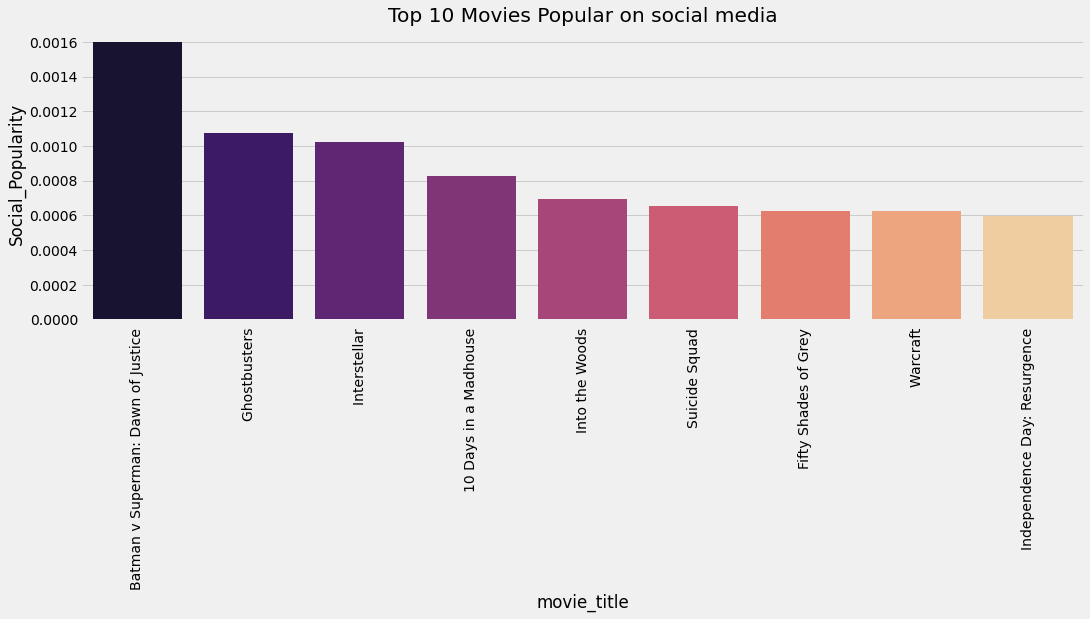

In [134]:
sns.barplot(x['movie_title'],x['Social_Popularity'],palette='magma')
plt.title('Top 10 Movies Popular on social media')
plt.xticks(rotation = 90,fontsize=14)
plt.show()

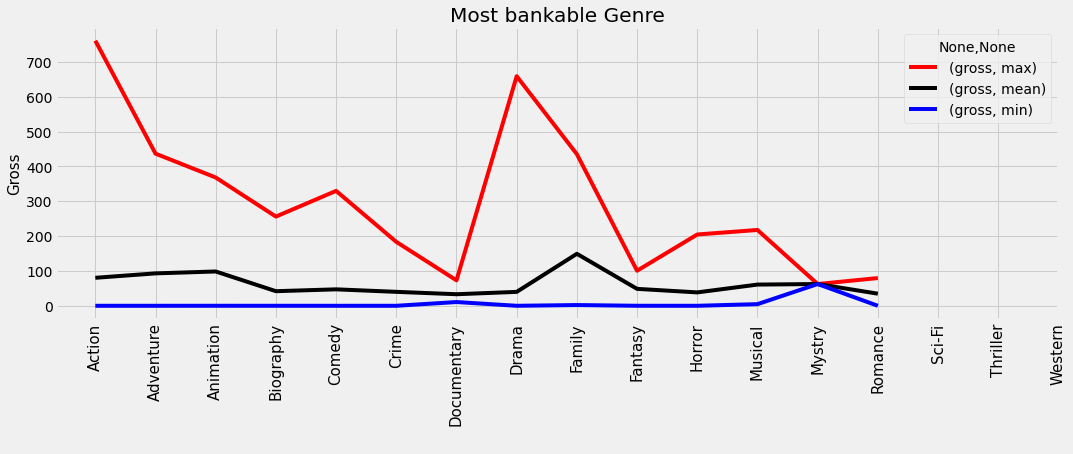

In [135]:
display(data[['Genre1','gross']].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap='Wistia'))

data[['Genre1','gross']].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line',
                                                                             color= ['red','black','blue'])
plt.title("Most bankable Genre")
plt.xticks(np.arange(17),['Action','Adventure','Animation',
                          'Biography',
                          'Comedy','Crime',
                          'Documentary','Drama',
                          'Family','Fantasy',
                          'Horror','Musical','Mystry','Romance',
                          'Sci-Fi','Thriller','Western'],rotation = 90,fontsize=15)
plt.ylabel('Gross',fontsize=15)
plt.xlabel(' ',)
plt.show()

In [136]:
print('The Most profitable movie from each genre\n')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                                                    'movie_title',
                                                                    'gross']].style.background_gradient(cmap='copper'))

The Most profitable movie from each genre



,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
2158,Crime,The Silence of the Lambs,130.727000
2834,Documentary,Justin Bieber: Never Say Never,73.000942
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [137]:
data['title_year'] = data['title_year'].astype('int')

In [138]:
print('Most Profitable Year in Boxoffice')
display(data[['title_year','language','Profit']].groupby(['language',
                                                          'title_year']).agg('sum').sort_values(by ='Profit',
                                                                                                ascending=False).head(10).style.background_gradient(cmap='Greens'))

Most Profitable Year in Boxoffice


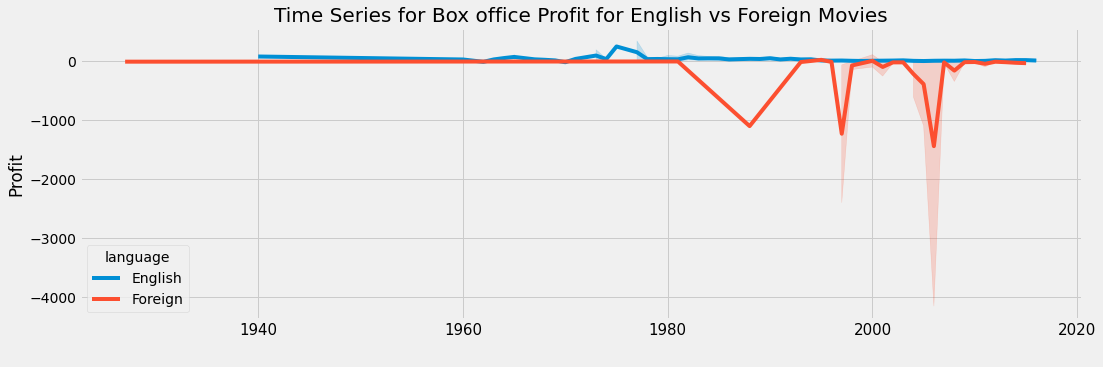

In [139]:
sns.lineplot(data['title_year'],data['Profit'],hue = data['language'])
plt.title('Time Series for Box office Profit for English vs Foreign Movies',fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel(' ')
plt.show()

In [140]:
print("Movies that made Huge Loss")
display(data[data['Profit'] < -2000][['movie_title',
                                      'language',
                                      'Profit']].style.background_gradient(cmap='Reds'))

Movies that made Huge Loss


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112


In [146]:
display(data[data['duration'] == 2][['movie_title','duration','gross',
                                          'Profit']].sort_values(by='Profit',ascending =  False).head(5))
display(data[data['duration'] == 1][['movie_title','duration','gross',
                                           'Profit']].sort_values(by='Profit',ascending = False).head(5))

,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,2,434.949459,424.449459
509,The Lion King,2,422.783777,377.783777
812,Deadpool,2,363.024263,305.024263
521,Despicable Me 2,2,368.049635,292.049635
338,Finding Nemo,2,380.838870,286.838870


,movie_title,duration,gross,Profit
0,Avatar,1,760.505847,523.505847
29,Jurassic World,1,652.177271,502.177271
26,Titanic,1,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,1,460.935665,449.935665
17,The Avengers,1,623.279547,403.279547


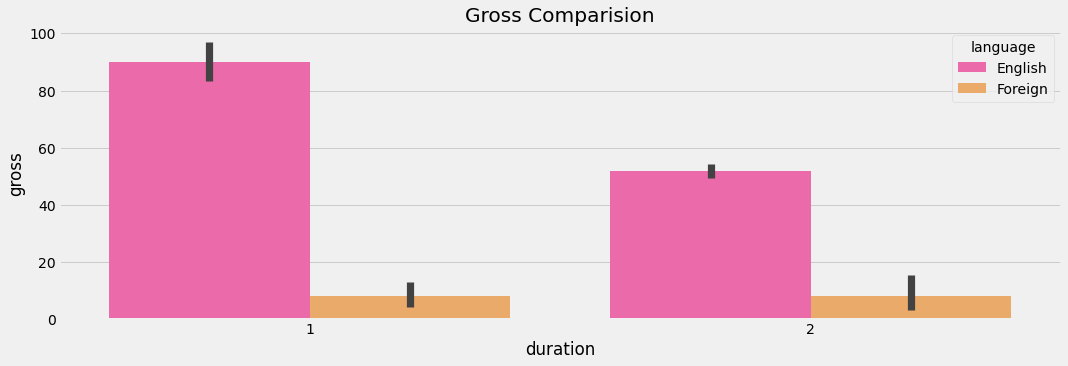

In [147]:
sns.barplot(data['duration'],data['gross'],hue= data['language'],palette='spring')
plt.title('Gross Comparision')
plt.show()

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3439
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           2997 non-null   object 
 1   num_critic_for_reviews  2997 non-null   float64
 2   duration                2997 non-null   int64  
 3   actor_2_name            2997 non-null   object 
 4   gross                   2997 non-null   float64
 5   genres                  2997 non-null   object 
 6   actor_1_name            2997 non-null   object 
 7   movie_title             2997 non-null   object 
 8   num_voted_users         2997 non-null   int64  
 9   actor_3_name            2997 non-null   object 
 10  num_user_for_reviews    2997 non-null   float64
 11  language                2997 non-null   object 
 12  country                 2997 non-null   object 
 13  budget                  2997 non-null   float64
 14  title_year              2997 non-null   

In [150]:
print("Average  IMDB Score for Long duration movie: {0:.2f}".format(data[data['duration'] == 1]['imdb_score'].mean()))
print("Average  IMDB Score for Short duration movie: {0:.2f}".format(data[data['duration'] == 2]['imdb_score'].mean()))

Average  IMDB Score for Long duration movie: 7.04
Average  IMDB Score for Short duration movie: 6.18


In [151]:
print('\nHighest Rated Long duration Movie\n',
      data[data['duration'] == 1][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending = False).head(5))
print('\nHighest Rated Short duration Movie\n',
      data[data['duration'] == 2][['movie_title','imdb_score']].sort_values(by='imdb_score',ascending = False).head(5))


Highest Rated Long duration Movie
                                          movie_title  imdb_score
1937                       The Shawshank Redemption          9.3
66                                  The Dark Knight          9.0
2837                         The Godfather: Part II          9.0
3355                                   Pulp Fiction          8.9
339   The Lord of the Rings: The Return of the King          8.9

Highest Rated Short duration Movie
                    movie_title  imdb_score
3175       American History X          8.6
2363       Back to the Future          8.5
2242                   Psycho          8.5
2152  Raiders of the Lost Ark          8.5
3277                    Alien          8.5


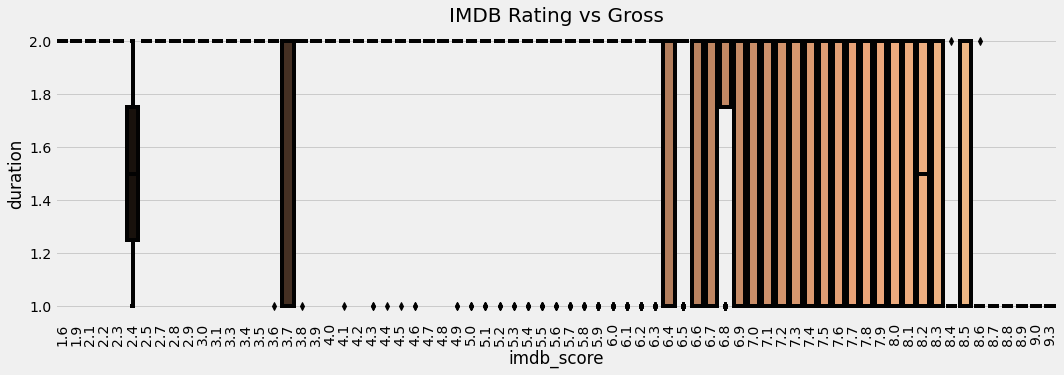

In [153]:
sns.boxplot(data['imdb_score'],data['duration'],palette='copper')
plt.title("IMDB Rating vs Gross",fontsize=20)
plt.xticks(rotation = 90)
plt.show()

In [154]:
def query_actors(x):
  a = data[data['actor_1_name'] == x]
  b = data[data['actor_2_name'] == x]
  c = data[data['actor_3_name'] == x]
  x = a.append(b)
  y = x.append(c)

  y = y[['movie_title','budget','gross','title_year','genres','language','imdb_score']]
  return y 

In [161]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


In [170]:
def actors_report(x):
  a = data[data['actor_1_name'] == x]
  b = data[data['actor_2_name'] == x]
  c = data[data['actor_3_name'] == x]
  x = a.append(b)
  y = x.append(c)
  print("Time:",y['title_year'].min(),y['title_year'].max())
  print('Max Gross : {0:.2f} Million'.format(y['gross'].max()))
  print('Average Gross : {0:.2f} Million'.format(y['gross'].mean()))
  print('Max Gross : {0:.2f} Million'.format(y['gross'].min()))
  print('Number of 100 Million Movies :',y[y['gross'] > 100].shape[0])
  print('Avg IMDB Score : {0:.2f}'.format(y['imdb_score'].mean()))
  print('Most Common Genres: \n',y['Genre1'].value_counts().head())  

actors_report('Hugh Jackman')


Time: 2000 2016
Max Gross : 234.36 Million
Average Gross : 96.74 Million
Max Gross : 8.83 Million
Number of 100 Million Movies : 9
Avg IMDB Score : 6.96
Most Common Genres: 
 Action       9
Drama        3
Adventure    3
Comedy       3
Biography    2
Name: Genre1, dtype: int64


In [174]:
def critically_acclaimed_actors(m):
  a = data[data['actor_1_name'] == m]
  b = data[data['actor_2_name'] == m]
  c = data[data['actor_3_name'] == m]
  x = a.append(b)
  y = x.append(c)
  return y['num_critic_for_reviews'].sum().astype('int')

print('Number of Critics Reviews for Brad Pitt')
display(critically_acclaimed_actors('Brad Pitt'))

print('Number of Critics Reviews for Leonardo DiCaprio')
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print('Number of Critics Reviews for Hugh Jackman')
display(critically_acclaimed_actors('Hugh Jackman'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


6524

Number of Critics Reviews for Hugh Jackman


6345

In [175]:
from ipywidgets import interact 
from ipywidgets import interact_manual 

In [177]:
pd.set_option('max_rows',3000)

@interact 
def show_movies_more_than(column = 'imdb_score',score=9.0):
  x = data.loc[data[column] > score][['title_year','movie_title','director_name',
                                      'actor_1_name','actor_2_name','actor_3_name',
                                      'Profit','imdb_score']]
  x = x.sort_values(by='imdb_score',ascending= False)
  x = x.drop_duplicates(keep ='first')
  return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=9.0, description='scor…

In [181]:
pd.set_option('max_rows',3000)

@interact
def show_articles_more_than(column=['budget','gross'],x=1000):
  return data.loc[data[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'duration'), value='budget'), IntSlide…

In [182]:
def recommed_lang(x):
  y = data[['language','movie_title','imdb_score']][data['language'] == x]
  y = y.sort_values(by='imdb_score',ascending = False)
  return y.head(10)

In [183]:
recommed_lang('Foreign')

,language,movie_title,imdb_score
2373,Foreign,Spirited Away,8.6
2970,Foreign,Das Boot,8.4
1298,Foreign,Amélie,8.4
2323,Foreign,Princess Mononoke,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2734,Foreign,Metropolis,8.3
2829,Foreign,Downfall,8.3
2047,Foreign,Howl's Moving Castle,8.2
2551,Foreign,Pan's Labyrinth,8.2
2830,Foreign,The Sea Inside,8.1


In [196]:
def recommed_movies_on_actors(x):
  a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
  b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
  c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
  x = a.append(b)
  y = x.append(c)
  a = a.sort_values(by='imdb_score',ascending = False)
  return a.head(20)

In [197]:
recommed_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
158,The Last Samurai,7.7
284,Minority Report,7.7
1524,A Few Good Men,7.6
736,Collateral,7.6
135,Mission: Impossible - Rogue Nation,7.4
155,Mission: Impossible - Ghost Protocol,7.4
930,Jerry Maguire,7.3
671,Eyes Wide Shut,7.3


In [198]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x,columns=te.columns_)

x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [199]:
genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [200]:
genres.insert(0,'movie_title',data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [201]:
genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [202]:
def recommendation(gen):
  gen = genres[gen]
  similar_gen =  genres.corrwith(gen)
  similar_gen =  similar_gen.sort_values(ascending=False)
  similar_gen = similar_gen.iloc[1:]
  return similar_gen.head(3)

In [203]:
recommendation('Action')

Thriller     0.308387
Adventure    0.290268
Sci-Fi       0.289350
dtype: float64

In [204]:
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,Batman v Superman: Dawn of Justice,Superman Returns,Quantum of Solace,Pirates of the Caribbean: Dead Man's Chest,The Lone Ranger,Man of Steel,The Chronicles of Narnia: Prince Caspian,The Avengers,Pirates of the Caribbean: On Stranger Tides,Men in Black 3,The Hobbit: The Battle of the Five Armies,The Amazing Spider-Man,Robin Hood,The Hobbit: The Desolation of Smaug,The Golden Compass,King Kong,Titanic,Captain America: Civil War,Battleship,Jurassic World,Skyfall,Spider-Man 2,Iron Man 3,Alice in Wonderland,X-Men: The Last Stand,Monsters University,Transformers: Revenge of the Fallen,Transformers: Age of Extinction,Oz the Great and Powerful,The Amazing Spider-Man 2,...,Paper Towns,NaN,Nebraska,Tales from the Crypt: Demon Knight,Max Keeble's Big Move,Young Adult,Crank,NaN,Living Out Loud,NaN,NaN,NaN,NaN,Das Boot,NaN,Sorority Boys,About Time,House of Flying Daggers,Arbitrage,Project Almanac,Cadillac Records,Screwed,Fortress,For Your Consideration,Celebrity,Running with Scissors,From Justin to Kelly,Girl 6,In the Cut,Two Lovers,Last Orders,The Host,NaN,Ravenous,Charlie Bartlett,The Great Beauty,The Dangerous Lives of Altar Boys,Stoker,2046,Married Life
Action,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,1,1,0


In [214]:
def recommendation_movie(movie):
  movie = x[movie +'\xa0']
  similar_movie =  x.corrwith(movie)
  similar_movie =  similar_movie.sort_values(ascending=False)
  similar_movie = similar_movie.iloc[1:]
  return similar_movie.head(15)

In [215]:
recommendation_movie('The Expendables')

movie_title
Pitch Perfect              1.0
Hudson Hawk                1.0
Bad Boys                   1.0
The Last Song              1.0
A View to a Kill           1.0
Enough                     1.0
Unleashed                  1.0
NaN                        1.0
Big                        1.0
Mr. Popper's Penguins      1.0
The Good German            1.0
Tammy                      1.0
Resurrecting the Champ     1.0
Annie                      1.0
21 & Over                  1.0
dtype: float64